# Wege & Zielpersonen & Haushalte

## 1. Import

### 1.1 Bib

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns

### 1.2 Data

In [2]:
wege = pd.read_csv("Data/wege.csv", sep=";", encoding="latin1")
zielpersonen = pd.read_csv("Data/zielpersonen.csv", sep=";", encoding="latin1")
haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding="latin1")

# Generierte df aus fahrzeuge.ipynb laden
etappen_freizeit = pd.read_csv(
    "generated_data/etappen_freizeit.csv", sep=";", encoding="utf-8"
)
wege_freizeit_agg = pd.read_csv(
    "generated_data/wege_freizeit_agg.csv", sep=";", encoding="utf-8"
)

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\1215316085.py:3: DtypeWarning: Columns (53,66) have mixed types. Specify dtype option on import or set low_memory=False.
  haushalte = pd.read_csv("Data/haushalte.csv", sep=";", encoding="latin1")


In [3]:
zielpersonen

,HHNR,WP,alter,gesl,proxi,sprache,DMOD,zeit_zp,BTag,USTag,...,AU_KANTON,AU_BFS,AU_PLZ,AU_AGGLO2012,AU_AGGLO_GROESSE2012,AU_staedt_char_2012,AU_stat_stadt_2012,AU_stadt_land_2012,AU_DEGURBA,AU_OeV_KLASSE
0,110001,1.606924,57,1,2,2,2,27.916667,05.03.2021,25.02.2021,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
1,110008,0.655876,57,1,2,2,2,29.933333,03.03.2021,07.02.2021,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
2,110011,0.279462,16,2,2,1,3,11.183333,04.02.2021,13.01.2021,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
3,110024,0.746432,17,2,2,1,2,13.966667,07.04.2021,23.03.2021,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
4,110026,0.525001,53,2,2,1,1,24.333333,14.04.2021,06.04.2021,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55013,459987,0.316219,59,2,2,1,2,10.333333,07.01.2022,05.01.2022,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
55014,459988,0.466182,41,2,2,1,3,23.083333,08.11.2021,15.10.2021,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
55015,459991,2.128337,88,2,2,1,3,14.483333,25.10.2021,23.10.2021,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99
55016,459993,1.274299,39,2,2,1,3,21.233333,28.01.2022,06.01.2022,...,-99,-99,-99,-99,-99,-99,-99,-99,-99,-99


## 2. Bereinigung Daten

In [4]:
# Nur relevante Spalten behalten
weg = wege[
    ["HHNR", "WEGNR", "S_X", "S_Y", "Z_X", "Z_Y", "f51700_weg", "dauer2", "wzweck1"]
]

# Umbenennen der Spalten
weg.rename(
    columns={
        "HHNR": "HHNR",
        "WEGNR": "Wegnummer",
        "S_X": "Start_X-Koordinate",
        "S_Y": "Start_Y-Koordinate",
        "Z_X": "Ziel_X-Koordinate",
        "Z_Y": "Ziel_Y-Koordinate",
        "f51700_weg": "Freizeitaktivität",
        "dauer2": "Dauer in Minuten",
        "wzweck1": "Wegzweck",
    },
    inplace=True,
)

weg.head()

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\1416114880.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weg.rename(


,HHNR,Wegnummer,Start_X-Koordinate,Start_Y-Koordinate,Ziel_X-Koordinate,Ziel_Y-Koordinate,Freizeitaktivität,Dauer in Minuten,Wegzweck
0,110001,1,6.559870,46.549366,6.564175,46.548909,-99,10,5.0
1,110001,2,6.564175,46.548909,6.573270,46.553510,-99,5,4.0
2,110001,3,6.573270,46.553510,6.559870,46.549366,-99,10,4.0
3,110001,4,6.559870,46.549366,6.552598,46.568205,2,10,8.0
4,110001,5,6.552598,46.568205,6.554009,46.540095,-99,15,5.0


In [5]:
# länge der Tabelle
len(weg)

151188

In [6]:
# zähle unique values in der Spalte WEgzweck
weg["Wegzweck"].value_counts()

Wegzweck
 8.0     55751
 2.0     30035
 4.0     27756
 3.0     12864
 5.0     10314
 9.0      5453
 10.0     4288
 11.0     1358
 12.0     1126
 6.0      1097
 7.0      1006
-99.0       93
-98.0       36
-97.0        9
Name: count, dtype: int64

In [7]:
# Nur relevante Spalten behalten
zielp = zielpersonen[
    [
        "HHNR",
        "alter",
        "gesl",
        "f20400a",
        "f20400b",
        "f20400c",
        "f20400d",
        "f40120",
        "f40920",
        "f50100a",
        "f42100a",
        "f42100b",
        "f42100c",
        "f42100d",
        "f42100e",
        "zivil",
        "ESTATUS",
        "T_FREIZEIT",
    ]
]

# Umbenennen der Spalten


zielp.rename(
    columns={
        "HHNR": "HHNR",
        "alter": "Alter",
        "gesl": "Geschlecht",
        "f20400a": "Führerausweis PW",
        "f20400b": "Führerausweis Motorräder",
        "f20400c": "Lernfahrausweis PW",
        "f20400d": "Lernfahrausweis Motorräder",
        "f40120": "Ausbildungsniveau",
        "f40920": "Beschäftigungsgrad",
        "f50100a": "Wetter",
        "f42100a": "Velo-Besitzer",
        "f42100b": "Mofa-Besitzer",
        "f42100c": "Kleinmotorrad-Besitzer",
        "f42100d": "Motorrad-Besitzer",
        "f42100e": "Auto-Besitzer",
        "zivil": "Familienstand",
        "ESTATUS": "Erwerbsstatus",
        "T_FREIZEIT": "Tägliche Freizeitwege",
    },
    inplace=True,
)


zielp.head()

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\3092195693.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  zielp.rename(


,HHNR,Alter,Geschlecht,Führerausweis PW,Führerausweis Motorräder,Lernfahrausweis PW,Lernfahrausweis Motorräder,Ausbildungsniveau,Beschäftigungsgrad,Wetter,Velo-Besitzer,Mofa-Besitzer,Kleinmotorrad-Besitzer,Motorrad-Besitzer,Auto-Besitzer,Familienstand,Erwerbsstatus,Tägliche Freizeitwege
0,110001,57,1,1,1,-99,-99,4,100,1,3,3,3,1,1,4,3,3
1,110008,57,1,1,1,-99,-99,2,-99,1,3,3,3,1,3,2,5,2
2,110011,16,2,-99,-99,-99,-99,2,100,5,1,3,3,-99,-99,1,4,1
3,110024,17,2,-99,-99,2,2,2,100,6,1,2,2,-99,-99,1,4,0
4,110026,53,2,1,1,-99,-99,4,-99,1,1,3,3,1,2,1,8,3


In [8]:
len(zielp)

55018

In [9]:
# dataset haushalte auf W_X, W_Y, W_ORT, W_PLZ, W_KANTON
haushalte = haushalte[["HHNR", "W_X", "W_Y", "W_ORT", "W_PLZ", "W_KANTON"]]
haushalte.head()

,HHNR,W_X,W_Y,W_ORT,W_PLZ,W_KANTON
0,110001,6.559870,46.549366,Bussigny,1030,22
1,110008,6.635652,46.785591,Yverdon-les-Bains,1400,22
2,110011,9.112485,47.451677,Henau,9247,17
3,110024,7.499629,46.897868,Belp,3123,2
4,110026,8.658613,47.724048,Schaffhausen,8207,14


In [10]:
# Dictionary zur Umbenennung der Spalten
rename_mapping = {
    "W_X": "Wohnort X-Koordinate",
    "W_Y": "Wohnort Y-Koordinate",
    "W_PLZ": "Wohnort: PLZ",
    "W_KANTON": "Wohnort: Kanton",
}

# Umbenennen der Spalten im DataFrame
haushalte = haushalte.rename(columns=rename_mapping)

Die Datensätze beinhalten keine Null-Werte und keine Duplikate

## 3. Merge

In [11]:
# Right Join der DataFrames auf Basis der Spalte 'HHNR'
merged_data = weg.merge(zielp, on="HHNR", how="left")

In [12]:
# Finde alle Wege, denen keine Zielperson zugeordnet ist
no_zielperson = merged_data[
    merged_data["Alter"].isna()
]  # 'alter' ist ein Beispiel; ersetze es durch eine Spalte, die nur in 'zielpersonen' existiert

# Gib die HHNR-Werte aus, die keine Zielperson zugeordnet haben
nicht_zugeordnete_wege = no_zielperson[
    "HHNR"
].unique()  # Gibt die eindeutigen HHNR ohne Zuordnung

print("Anzahl der Wege ohne zugeordnete Zielperson:", len(nicht_zugeordnete_wege))
print("HHNR-Werte ohne zugeordnete Zielperson:", nicht_zugeordnete_wege)

Anzahl der Wege ohne zugeordnete Zielperson: 0
HHNR-Werte ohne zugeordnete Zielperson: []


In [13]:
# haushalte zu merged_data mergen über die Spalte HHNR
merged_data = merged_data.merge(haushalte, on="HHNR", how="left")

In [14]:
len(merged_data)

151188

Dataset verfügt noch über 151'188 Einträge

In [15]:
merged_data.head()

,HHNR,Wegnummer,Start_X-Koordinate,Start_Y-Koordinate,Ziel_X-Koordinate,Ziel_Y-Koordinate,Freizeitaktivität,Dauer in Minuten,Wegzweck,Alter,...,Motorrad-Besitzer,Auto-Besitzer,Familienstand,Erwerbsstatus,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton
0,110001,1,6.559870,46.549366,6.564175,46.548909,-99,10,5.0,57,...,1,1,4,3,3,6.55987,46.549366,Bussigny,1030,22
1,110001,2,6.564175,46.548909,6.573270,46.553510,-99,5,4.0,57,...,1,1,4,3,3,6.55987,46.549366,Bussigny,1030,22
2,110001,3,6.573270,46.553510,6.559870,46.549366,-99,10,4.0,57,...,1,1,4,3,3,6.55987,46.549366,Bussigny,1030,22
3,110001,4,6.559870,46.549366,6.552598,46.568205,2,10,8.0,57,...,1,1,4,3,3,6.55987,46.549366,Bussigny,1030,22
4,110001,5,6.552598,46.568205,6.554009,46.540095,-99,15,5.0,57,...,1,1,4,3,3,6.55987,46.549366,Bussigny,1030,22


In [16]:
merged_data.columns

Index(['HHNR', 'Wegnummer', 'Start_X-Koordinate', 'Start_Y-Koordinate',
       'Ziel_X-Koordinate', 'Ziel_Y-Koordinate', 'Freizeitaktivität',
       'Dauer in Minuten', 'Wegzweck', 'Alter', 'Geschlecht',
       'Führerausweis PW', 'Führerausweis Motorräder', 'Lernfahrausweis PW',
       'Lernfahrausweis Motorräder', 'Ausbildungsniveau', 'Beschäftigungsgrad',
       'Wetter', 'Velo-Besitzer', 'Mofa-Besitzer', 'Kleinmotorrad-Besitzer',
       'Motorrad-Besitzer', 'Auto-Besitzer', 'Familienstand', 'Erwerbsstatus',
       'Tägliche Freizeitwege', 'Wohnort X-Koordinate', 'Wohnort Y-Koordinate',
       'W_ORT', 'Wohnort: PLZ', 'Wohnort: Kanton'],
      dtype='object')

## 4. Filter


Wegzwecke Filter auf 8 setzen für Freizeitwege

In [17]:
merged_data["Wegzweck"].unique()

array([  5.,   4.,   8.,   2.,  11.,   3.,   9.,   7.,  10.,  12.,   6.,
       -99., -98., -97.,  nan])

In [18]:
# Filtere komplette Tabelle auf Wegzwecke = 8
merged_data_leisure = merged_data[merged_data["Wegzweck"] == 8]

In [19]:
len(merged_data_leisure)

55751

Dataset verfügt noch über 55'751 Einträge

Art der Freizeitaktivität kategorisieren:

- -99: WZWECK1 NE 8
- -98: Keine Antwort
- -97: weiss nicht

- 18: Anderes - manuell Aufnehmen
- 22: mehrere Aktivitäten

Alles zu unbekannt


In [20]:
# Ersetzen der spezifischen Werte -99, -98, -97, 18 und 22 durch "unbekannt"
merged_data_leisure.loc[
    merged_data_leisure["Freizeitaktivität"].isin([-99, -98, -97, 18, 22]),
    "Freizeitaktivität",
] = "unbekannt"

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\3829539240.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unbekannt' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  merged_data_leisure.loc[


In [21]:
# # Konventieren der Spalte Freizeitaktivität in String
# merged_data_leisure_num["Freizeitaktivität"] = merged_data_leisure[
#     "Freizeitaktivität"
# ].astype(str)
# # korrelationsmatrix erstellen mit numerischen Werten
# merged_data_leisure_num = merged_data_leisure.select_dtypes(include=[np.number])
# correlation_matrix = merged_data_leisure_num.corr()
# # Als heatmap darstellen
# plt.figure(figsize=(12, 12))
# plt.matshow(correlation_matrix, fignum=1)
# plt.xticks(
#     range(len(correlation_matrix.columns)),
#     correlation_matrix.columns,
#     rotation="vertical",
# )
# plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
# plt.colorbar()
# plt.show()

Freizeitaktivitäten; Nummern ausschreiben

    1: "Besuche (Verwandte, Bekannte, Freunde)",
    2: "Gastronomiebesuch (Restaurant, Bar, Café,)",
    3: "Aktiver Sport (Fussball, Jogging)",
    4: "Wanderung",
    5: "Velofahrt",
    6: "Passiver Sport (Matchbesuch)",
    7: "Nicht-sportliche Aussenaktivität (z.B. Spazieren mit dem Hund)",
    8: "Medizin/Wellness/Fitness",
    9: "Kulturveranstaltungen, Freizeitanlagen (z.B. Vergnügungsparks)",
    10: "Unbezahlte Arbeit",
    11: "Vereinstätigkeit",
    12: "Ausflug, Ferien",
    13: "Religion (Kirche, Friedhof, Pilgerfahrt)",
    14: "Häusliche Freizeitaktivitäten auswärts",
    15: "Essen ohne Gastronomiebesuch (Pick-Nick, Grillparty etc.)",
    16: "Einkaufsbummel / Shopping",
    17: "Rundreise (Auto-/Motorrad-/Zugsfahrt etc.)"

In [22]:
# Mapping-Liste für die neuen Bezeichnungen
freizeitaktivitaeten_mapping = {
    1: "Besuche",
    2: "Gastronomiebesuch",
    3: "Aktiver Sport",
    4: "Wanderung",
    5: "Velofahrt",
    6: "Passiver Sport",
    7: "Nicht-sportliche Aussenaktivität",
    8: "Medizin/Wellness/Fitness",
    9: "Kulturveranstaltungen, Freizeitanlagen",
    10: "Unbezahlte Arbeit",
    11: "Vereinstätigkeit",
    12: "Ausflug, Ferien",
    13: "Religion",
    14: "Häusliche Freizeitaktivitäten auswärts",
    15: "Essen ohne Gastronomiebesuch",
    16: "Einkaufsbummel / Shopping",
    17: "Rundreise",
}

# Umbenennen der Werte in der Spalte 'Freizeitaktivität' anhand der Mapping-Liste
merged_data_leisure["Freizeitaktivität"] = merged_data_leisure["Freizeitaktivität"].map(
    freizeitaktivitaeten_mapping
)

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\3585027052.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_leisure["Freizeitaktivität"] = merged_data_leisure["Freizeitaktivität"].map(


In [23]:
# Mapping-Dictionary für die Kantonsnummern
kanton_mapping = {
    -97: "unbekannt",
    1: "Zürich",
    2: "Bern",
    3: "Luzern",
    4: "Uri",
    5: "Schwyz",
    6: "Obwalden",
    7: "Nidwalden",
    8: "Glarus",
    9: "Zug",
    10: "Fribourg",
    11: "Solothurn",
    12: "Basel-Stadt",
    13: "Basel-Land",
    14: "Schaffhausen",
    15: "Appenzell Ausserrhoden",
    16: "Appenzell Innerrhoden",
    17: "St. Gallen",
    18: "Graubünden",
    19: "Aargau",
    20: "Thurgau",
    21: "Ticino",
    22: "Vaud",
    23: "Valais",
    24: "Neuchâtel",
    25: "Genève",
    26: "Jura",
}

# Umbenennen der Werte in der Spalte 'Wohnort: Kanton' anhand der Mapping-Liste
merged_data_leisure["Wohnort: Kanton"] = merged_data_leisure["Wohnort: Kanton"].map(
    kanton_mapping
)

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\1990570679.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data_leisure["Wohnort: Kanton"] = merged_data_leisure["Wohnort: Kanton"].map(


In [24]:
len(merged_data_leisure)

55751

In [25]:
merged_data_leisure.head()

,HHNR,Wegnummer,Start_X-Koordinate,Start_Y-Koordinate,Ziel_X-Koordinate,Ziel_Y-Koordinate,Freizeitaktivität,Dauer in Minuten,Wegzweck,Alter,...,Motorrad-Besitzer,Auto-Besitzer,Familienstand,Erwerbsstatus,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton
3,110001,4,6.559870,46.549366,6.552598,46.568205,Gastronomiebesuch,10,8.0,57,...,1,1,4,3,3,6.559870,46.549366,Bussigny,1030,Vaud
5,110001,6,6.554009,46.540095,6.554009,46.540095,Einkaufsbummel / Shopping,5,8.0,57,...,1,1,4,3,3,6.559870,46.549366,Bussigny,1030,Vaud
6,110001,7,6.554009,46.540095,6.559870,46.549366,NaN,10,8.0,57,...,1,1,4,3,3,6.559870,46.549366,Bussigny,1030,Vaud
7,110008,1,6.635652,46.785591,6.635652,46.785591,Nicht-sportliche Aussenaktivität,120,8.0,57,...,1,3,2,5,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud
10,110008,4,6.635652,46.785591,6.635652,46.785591,Aktiver Sport,120,8.0,57,...,1,3,2,5,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud


In [26]:
merged_data_leisure.info()

<class 'pandas.core.frame.DataFrame'>
Index: 55751 entries, 3 to 151182
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HHNR                        55751 non-null  int64  
 1   Wegnummer                   55751 non-null  int64  
 2   Start_X-Koordinate          55751 non-null  float64
 3   Start_Y-Koordinate          55751 non-null  float64
 4   Ziel_X-Koordinate           55751 non-null  float64
 5   Ziel_Y-Koordinate           55751 non-null  float64
 6   Freizeitaktivität           36872 non-null  object 
 7   Dauer in Minuten            55751 non-null  int64  
 8   Wegzweck                    55751 non-null  float64
 9   Alter                       55751 non-null  int64  
 10  Geschlecht                  55751 non-null  int64  
 11  Führerausweis PW            55751 non-null  int64  
 12  Führerausweis Motorräder    55751 non-null  int64  
 13  Lernfahrausweis PW          55751 n

Dataset verfügt noch über 55'751 Einträge

In [27]:
# Merge über HHNR und Wegnummer mit etappen_freizeit
etappen_freizeit_erweitert = etappen_freizeit.merge(
    merged_data_leisure, on=["HHNR", "Wegnummer"], how="left"
)

etappen_freizeit_erweitert.head()

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Zweck,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,...,Motorrad-Besitzer,Auto-Besitzer,Familienstand,Erwerbsstatus,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton
0,110001,4,4,Auto,8,3.973,6.559870,46.549366,6.552598,46.568205,...,1,1,4,3,3,6.559870,46.549366,Bussigny,1030,Vaud
1,110001,6,6,Auto,8,0.404,6.554009,46.540095,6.554009,46.540095,...,1,1,4,3,3,6.559870,46.549366,Bussigny,1030,Vaud
2,110001,7,7,Auto,11,1.932,6.554009,46.540095,6.559870,46.549366,...,1,1,4,3,3,6.559870,46.549366,Bussigny,1030,Vaud
3,110008,1,1,Zu Fuss,8,5.778,6.635652,46.785591,6.635652,46.785591,...,1,3,2,5,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud
4,110008,4,4,Zu Fuss,8,3.262,6.635652,46.785591,6.635652,46.785591,...,1,3,2,5,2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud


In [28]:
# Bereinigung des gemergten DataFrames
# Führerausweise und Lernfahrausweise zusammenfassen
etappen_freizeit_erweitert["Führerausweis_PW"] = (
    etappen_freizeit_erweitert["Führerausweis PW"] == 1
) | (etappen_freizeit_erweitert["Lernfahrausweis PW"] == 1)
etappen_freizeit_erweitert["Führerausweis_Motorrad"] = (
    etappen_freizeit_erweitert["Führerausweis Motorräder"] == 1
) | (etappen_freizeit_erweitert["Lernfahrausweis Motorräder"] == 1)


# Spalteninhalte ausschreiben
# Geschlecht
etappen_freizeit_erweitert["Geschlecht"] = etappen_freizeit_erweitert[
    "Geschlecht"
].replace({1: "männlich", 2: "weiblich"})

# Ausbildungsniveau
# Mapping-Dictionary zur Umbenennung und Zusammenfassung der Kategorien
education_mapping = {
    -99: "Keine Angabe",
    -98: "Keine Angabe",
    -97: "Keine Angabe",
    1: "Keine Schulbildung",
    2: "Obligatorische Schule",
    3: "Berufliche Grundbildung / Allgemeinbildung ohne Maturität",
    4: "Berufliche Grundbildung / Allgemeinbildung ohne Maturität",
    5: "Maturität / Höhere Berufsbildung",
    6: "Maturität / Höhere Berufsbildung",
    7: "Höhere Fachschule / Universität",
    8: "Höhere Fachschule / Universität",
    9: "Doktorat / Habilitation",
}

# Neue Spalte mit den zusammengefassten Kategorien erstellen
etappen_freizeit_erweitert["Ausbildungsniveau"] = (
    etappen_freizeit_erweitert["Ausbildungsniveau"]
    .map(education_mapping)
    .fillna("Keine Angabe")
)

# Beschäftigungsgrad kategorisieren
etappen_freizeit_erweitert["Beschäftigungsgrad"] = etappen_freizeit_erweitert[
    "Beschäftigungsgrad"
].apply(
    lambda x: (
        "unbekannt"
        if x == -99
        else "Teilzeit" if 1 <= x <= 79 else "Vollzeit" if x >= 80 else "unbekannt"
    )
)

# Velo-Besitzer (teilweise verfügbar wird als Ja gewertet)
etappen_freizeit_erweitert["Velo-Besitzer"] = (
    etappen_freizeit_erweitert["Velo-Besitzer"] == 1
) | (etappen_freizeit_erweitert["Velo-Besitzer"] == 2)

# Mofa-Besitzer (inkl. Kleinmotorrad-Besitzer, teilweise verfügbar wird als Ja gewertet)
etappen_freizeit_erweitert["Mofa-Besitzer"] = (
    (etappen_freizeit_erweitert["Mofa-Besitzer"] == 1)
    | (etappen_freizeit_erweitert["Mofa-Besitzer"] == 2)
    | (etappen_freizeit_erweitert["Kleinmotorrad-Besitzer"] == 1)
    | (etappen_freizeit_erweitert["Kleinmotorrad-Besitzer"] == 2)
)

# Motorrad-Besitzer (teilweise verfügbar wird als Ja gewertet)
etappen_freizeit_erweitert["Motorrad-Besitzer"] = (
    etappen_freizeit_erweitert["Motorrad-Besitzer"] == 1
) | (etappen_freizeit_erweitert["Motorrad-Besitzer"] == 2)

# Auto-Besitzer (teilweise verfügbar wird als Ja gewertet)
etappen_freizeit_erweitert["Auto-Besitzer"] = (
    etappen_freizeit_erweitert["Auto-Besitzer"] == 1
) | (etappen_freizeit_erweitert["Auto-Besitzer"] == 2)


# Familienstand
# Mapping-Dictionary zur Umbenennung der Kategorien
marital_status_mapping = {
    1: "single",
    2: "vergeben",  # verheiratet
    3: "single",  # verwitwet
    4: "single",  # geschieden
    5: "vergeben",  # unverheiratet
    6: "vergeben",  # eingetragene Partnerschaft
    7: "single",  # aufgelöste Partnerschaft
}

# Neue Spalte mit den zusammengefassten Kategorien erstellen
etappen_freizeit_erweitert["Familienstand"] = etappen_freizeit_erweitert[
    "Familienstand"
].map(marital_status_mapping)

# Erwerbsstatus
# Mapping-Dictionary zur Umbenennung der Kategorien
employment_status_mapping = {
    1: "Selbständig",
    2: "Selbständig",  # Arbeitnehmer(in) in der AG oder GmbH, welche IHNEN selbst gehört
    3: "Mitarbeiter(in)",  # Mitarbeiter(in) im Familienbetrieb von einem Haushaltsmitglied
    4: "Mitarbeiter(in)",  # Arbeitnehmer(in) bei einem sonstigen privaten oder öffentlichen Unternehmen
    5: "Lernende(r)",
    -99: "nicht erwerbstätig",
}

# Neue Spalte mit den zusammengefassten Kategorien erstellen
etappen_freizeit_erweitert["Erwerbsstatus"] = etappen_freizeit_erweitert[
    "Erwerbsstatus"
].map(employment_status_mapping)

# Spalte Freizeitaktivität_y umbenennen
etappen_freizeit_erweitert.rename(
    columns={"Freizeitaktivität_y": "Freizeitaktivität"}, inplace=True
)

In [29]:
etappen_freizeit_erweitert.columns

Index(['HHNR', 'Etappennummer', 'Wegnummer', 'Verkehrsmittel', 'Zweck',
       'Distanz_km', 'Start_X', 'Start_Y', 'Ziel_X', 'Ziel_Y',
       'Freizeitaktivität_x', 'gwp_pro_Kilometer_[g]', 'Emissionen', 'WEGNR',
       'Start_X-Koordinate', 'Start_Y-Koordinate', 'Ziel_X-Koordinate',
       'Ziel_Y-Koordinate', 'Freizeitaktivität', 'Dauer in Minuten',
       'Wegzweck', 'Alter', 'Geschlecht', 'Führerausweis PW',
       'Führerausweis Motorräder', 'Lernfahrausweis PW',
       'Lernfahrausweis Motorräder', 'Ausbildungsniveau', 'Beschäftigungsgrad',
       'Wetter', 'Velo-Besitzer', 'Mofa-Besitzer', 'Kleinmotorrad-Besitzer',
       'Motorrad-Besitzer', 'Auto-Besitzer', 'Familienstand', 'Erwerbsstatus',
       'Tägliche Freizeitwege', 'Wohnort X-Koordinate', 'Wohnort Y-Koordinate',
       'W_ORT', 'Wohnort: PLZ', 'Wohnort: Kanton', 'Führerausweis_PW',
       'Führerausweis_Motorrad'],
      dtype='object')

In [30]:
# Gruppierung nach HHNR und Wegnummer mit Berechnung der Summen
wege_freizeit_erweitert = (
    etappen_freizeit_erweitert.groupby(["HHNR", "Wegnummer"])
    .agg(
        {
            "Distanz_km": "sum",
            "Emissionen": "sum",
            "Verkehrsmittel": lambda x: ", ".join(x),
        }
    )
    .reset_index()
)

# Hinzufügen der Werte aus den ersten Zeilen der anderen Spalten
erste_werte = (
    etappen_freizeit_erweitert.groupby(["HHNR", "Wegnummer"]).first().reset_index()
)

# Kombinieren der Aggregationen mit den ersten Werten
wege_freizeit_erweitert = pd.merge(
    wege_freizeit_erweitert,
    erste_werte,
    on=["HHNR", "Wegnummer"],
    suffixes=("", "_first"),
)

In [31]:
# Merge mit weg um Koordinaten zu erhalten
wege_freizeit_erweitert = wege_freizeit_erweitert.merge(
    weg[
        [
            "HHNR",
            "Wegnummer",
            "Start_X-Koordinate",
            "Start_Y-Koordinate",
            "Ziel_X-Koordinate",
            "Ziel_Y-Koordinate",
        ]
    ],
    on=["HHNR", "Wegnummer"],
    how="left",
)

In [32]:
# Alter in Kategorien einteilen
wege_freizeit_erweitert["Alter"] = pd.cut(
    wege_freizeit_erweitert["Alter"],
    bins=[0, 10, 18, 25, 40, 60, 80, 100],
    labels=["0-10", "11-18", "19-25", "26-40", "41-60", "61-80", "81-100"],
    right=False,
)

In [33]:
# unnötige/doppelte Spalten entfernen
etappen_freizeit_erweitert = etappen_freizeit_erweitert.drop(
    columns=[
        "Start_X-Koordinate",
        "Start_Y-Koordinate",
        "Ziel_X-Koordinate",
        "Ziel_Y-Koordinate",
        "Freizeitaktivität_x",
        "Zweck",
        "Führerausweis PW",
        "Führerausweis Motorräder",
        "Lernfahrausweis PW",
        "Lernfahrausweis Motorräder",
        "Kleinmotorrad-Besitzer",
    ]
)
# Alter in Kategorien einteilen
etappen_freizeit_erweitert["Alter"] = pd.cut(
    etappen_freizeit_erweitert["Alter"],
    bins=[0, 10, 18, 25, 40, 60, 80, 100],
    labels=["0-10", "11-18", "19-25", "26-40", "41-60", "61-80", "81-100"],
    right=False,
)

In [34]:
etappen_freizeit_erweitert

,HHNR,Etappennummer,Wegnummer,Verkehrsmittel,Distanz_km,Start_X,Start_Y,Ziel_X,Ziel_Y,gwp_pro_Kilometer_[g],...,Familienstand,Erwerbsstatus,Tägliche Freizeitwege,Wohnort X-Koordinate,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad
0,110001,4,4,Auto,3.973,6.559870,46.549366,6.552598,46.568205,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
1,110001,6,6,Auto,0.404,6.554009,46.540095,6.554009,46.540095,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
2,110001,7,7,Auto,1.932,6.554009,46.540095,6.559870,46.549366,128.922796,...,single,Mitarbeiter(in),3,6.559870,46.549366,Bussigny,1030,Vaud,True,True
3,110008,1,1,Zu Fuss,5.778,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True
4,110008,4,4,Zu Fuss,3.262,6.635652,46.785591,6.635652,46.785591,0.000000,...,vergeben,Lernende(r),2,6.635652,46.785591,Yverdon-les-Bains,1400,Vaud,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71467,459981,4,2,Zu Fuss,0.067,9.025833,46.193579,9.026348,46.193224,0.000000,...,single,Mitarbeiter(in),3,8.980385,45.904131,Capolago,6825,Ticino,True,True
71468,459981,11,7,Auto,22.238,8.980385,45.904131,8.967822,46.027943,128.922796,...,single,Mitarbeiter(in),3,8.980385,45.904131,Capolago,6825,Ticino,True,True
71469,459981,12,7,Zu Fuss,0.519,8.967822,46.027943,8.964244,46.027417,0.000000,...,single,Mitarbeiter(in),3,8.980385,45.904131,Capolago,6825,Ticino,True,True
71470,459981,13,8,Zu Fuss,0.519,8.964244,46.027417,8.967822,46.027943,0.000000,...,single,Mitarbeiter(in),3,8.980385,45.904131,Capolago,6825,Ticino,True,True


In [35]:
wege_freizeit_erweitert

,HHNR,Wegnummer,Distanz_km,Emissionen,Verkehrsmittel,Etappennummer,Verkehrsmittel_first,Zweck,Distanz_km_first,Start_X,...,Wohnort Y-Koordinate,W_ORT,Wohnort: PLZ,Wohnort: Kanton,Führerausweis_PW,Führerausweis_Motorrad,Start_X-Koordinate_y,Start_Y-Koordinate_y,Ziel_X-Koordinate_y,Ziel_Y-Koordinate_y
0,110001,4,3.973,512.210270,Auto,4,Auto,8,3.973,6.559870,...,46.549366,Bussigny,1030,Vaud,True,True,6.559870,46.549366,6.552598,46.568205
1,110001,6,0.404,52.084810,Auto,6,Auto,8,0.404,6.554009,...,46.549366,Bussigny,1030,Vaud,True,True,6.554009,46.540095,6.554009,46.540095
2,110001,7,1.932,249.078843,Auto,7,Auto,11,1.932,6.554009,...,46.549366,Bussigny,1030,Vaud,True,True,6.554009,46.540095,6.559870,46.549366
3,110008,1,5.778,0.000000,Zu Fuss,1,Zu Fuss,8,5.778,6.635652,...,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591
4,110008,4,3.262,0.000000,Zu Fuss,4,Zu Fuss,8,3.262,6.635652,...,46.785591,Yverdon-les-Bains,1400,Vaud,True,True,6.635652,46.785591,6.635652,46.785591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55746,459971,1,14.000,0.000000,Zu Fuss,1,Zu Fuss,8,14.000,7.294728,...,46.515562,Morges,1110,Vaud,True,False,7.294728,46.183483,7.294728,46.183483
55747,459976,3,1.852,387.917463,Auto,5,Auto,8,1.852,7.577385,...,47.721191,Schaffhausen,8207,Schaffhausen,True,False,7.577385,47.560109,7.573720,47.554275
55748,459981,2,0.067,0.000000,Zu Fuss,4,Zu Fuss,8,0.067,9.025833,...,45.904131,Capolago,6825,Ticino,True,True,9.025833,46.193579,9.026348,46.193224
55749,459981,7,22.757,2866.985148,"Auto, Zu Fuss",11,Auto,8,22.238,8.980385,...,45.904131,Capolago,6825,Ticino,True,True,8.980385,45.904131,8.964244,46.027417


In [36]:
# df speichern zur Weiterverarbeitung
etappen_freizeit_erweitert.to_csv(
    "generated_data/etappen_freizeit_erweitert.csv",
    sep=";",
    encoding="utf-8",
    index=False,
)

wege_freizeit_erweitert.to_csv(
    "generated_data/wege_freizeit_erweitert.csv", sep=";", encoding="utf-8", index=False
)

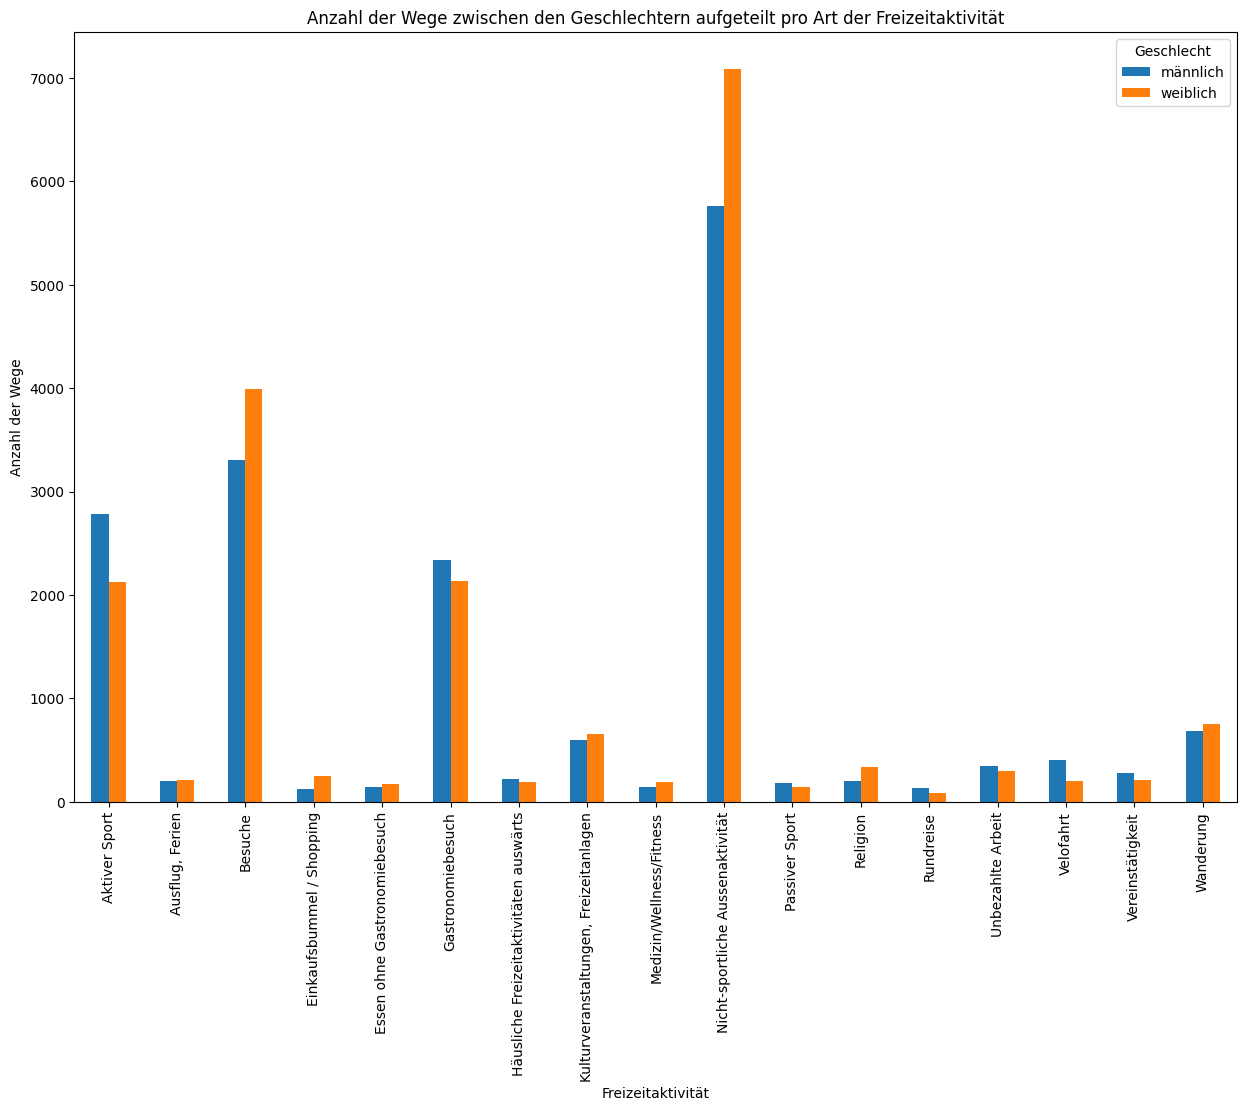

In [37]:
# Vergleich zwischen Anzahl der Wege zwischen den Geschlechtern aufgeteilt pro Art der Freizeitaktivität
ax = (
    wege_freizeit_erweitert.groupby(["Freizeitaktivität", "Geschlecht"])
    .size()
    .unstack()
    .plot(kind="bar", stacked=False, figsize=(15, 10))
)
plt.title(
    "Anzahl der Wege zwischen den Geschlechtern aufgeteilt pro Art der Freizeitaktivität"
)
plt.xlabel("Freizeitaktivität")
plt.ylabel("Anzahl der Wege")
plt.xticks(rotation=90)
plt.legend(title="Geschlecht")
plt.show()

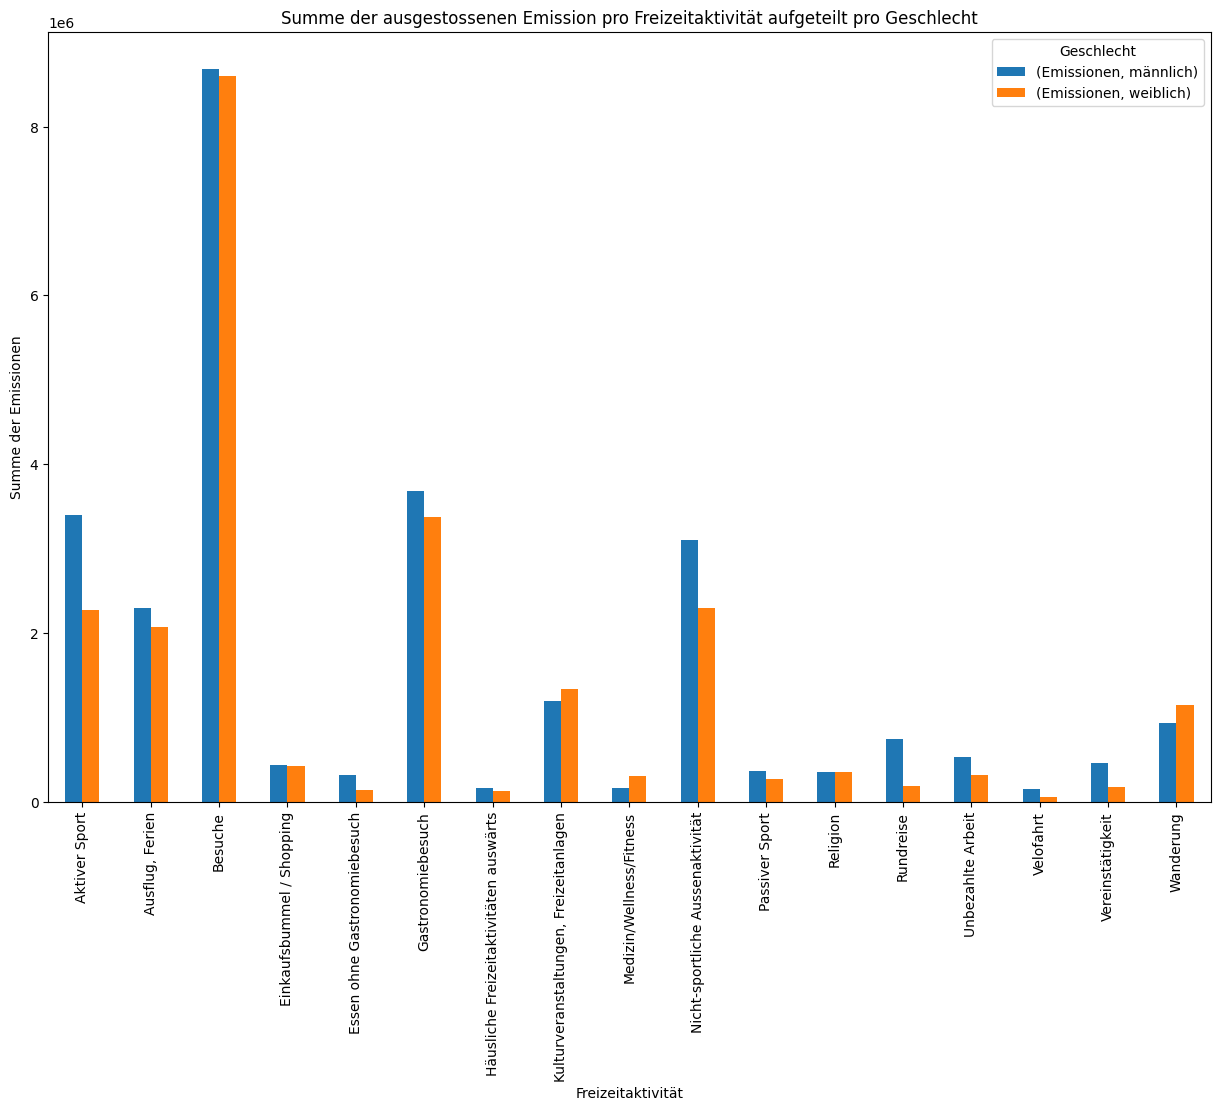

In [38]:
# Summe der ausgestossenen Emission pro Freizeitaktivität aufgeteilt pro Geschlecht
ax = (
    wege_freizeit_erweitert.groupby(["Freizeitaktivität", "Geschlecht"])
    .agg({"Emissionen": "sum"})
    .unstack()
    .plot(kind="bar", stacked=False, figsize=(15, 10))
)
plt.title(
    "Summe der ausgestossenen Emission pro Freizeitaktivität aufgeteilt pro Geschlecht"
)
plt.xlabel("Freizeitaktivität")
plt.ylabel("Summe der Emissionen")
plt.xticks(rotation=90)
plt.legend(title="Geschlecht")
plt.show()

In [39]:
# Vergleich zwischen Anzahl der Wege zwischen den Alterskategorien mit titol dropdown liste um alter auszuwählen aufgeteilt pro Art der Freizeitaktivität
import ipywidgets as widgets
from ipywidgets import interact


@interact
def plot_alter(Alter=wege_freizeit_erweitert["Alter"].unique()):
    ax = (
        wege_freizeit_erweitert[wege_freizeit_erweitert["Alter"] == Alter]
        .groupby(["Freizeitaktivität", "Alter"])
        .size()
        .unstack()
        .plot(kind="bar", stacked=True)
    )
    plt.title(
        f"Anzahl der Wege zwischen den Alterskategorien aufgeteilt pro Art der Freizeitaktivität für Alter {Alter}"
    )
    plt.xlabel("Freizeitaktivität")
    plt.ylabel("Anzahl der Wege")
    plt.xticks(rotation=90)
    plt.legend(title="Alter")
    plt.show()

interactive(children=(Dropdown(description='Alter', options=('41-60', '11-18', '0-10', '61-80', '19-25', '26-4…

In [40]:
# Emissonen pro Alter und Freizeitaktivität inkl. Dropdown-Liste für das Alter
@interact
def plot_alter(Alter=wege_freizeit_erweitert["Alter"].unique()):
    ax = (
        wege_freizeit_erweitert[wege_freizeit_erweitert["Alter"] == Alter]
        .groupby(["Freizeitaktivität", "Alter"])
        .agg({"Emissionen": "sum"})
        .unstack()
        .plot(kind="bar", stacked=True)
    )
    plt.title(
        f"Summe der ausgestossenen Emission pro Freizeitaktivität aufgeteilt pro Alter für Alter {Alter}"
    )
    plt.xlabel("Freizeitaktivität")
    plt.ylabel("Summe der Emissionen")
    plt.xticks(rotation=90)
    plt.legend(title="Alter")
    plt.show()

interactive(children=(Dropdown(description='Alter', options=('41-60', '11-18', '0-10', '61-80', '19-25', '26-4…

In [41]:
# Vergleich zwischen Anzahl der Wege zwischen dem Beschäftigungsgrad mit titol dropdown liste um Freizeitaktivität auszuwählen  aufgeteilt pro Beschäftigungsgrad
@interact
def plot_beschäftigungsgrad(
    Freizeitaktivität=wege_freizeit_erweitert["Freizeitaktivität"].unique(),
):
    ax = (
        wege_freizeit_erweitert[
            wege_freizeit_erweitert["Freizeitaktivität"] == Freizeitaktivität
        ]
        .groupby(["Freizeitaktivität", "Beschäftigungsgrad"])
        .size()
        .unstack()
        .plot(kind="bar", stacked=False, width=0.5)
    )
    plt.title(
        f"Anzahl der Wege zwischen den Beschäftigungsgraden aufgeteilt pro Art der Freizeitaktivität für {Freizeitaktivität}"
    )
    plt.xlabel("Freizeitaktivität")
    plt.ylabel("Anzahl der Wege")
    plt.xticks(rotation=90)
    plt.legend(title="Beschäftigungsgrad")
    plt.show()

interactive(children=(Dropdown(description='Freizeitaktivität', options=('Gastronomiebesuch', 'Einkaufsbummel …

In [42]:
# Emissonen pro Beschäftigungsgrad und Freizeitaktivität inkl. Dropdown-Liste für die Freizeitaktivität
@interact
def plot_beschäftigungsgrad(
    Freizeitaktivität=wege_freizeit_erweitert["Freizeitaktivität"].unique(),
):
    ax = (
        wege_freizeit_erweitert[
            wege_freizeit_erweitert["Freizeitaktivität"] == Freizeitaktivität
        ]
        .groupby(["Freizeitaktivität", "Beschäftigungsgrad"])
        .agg({"Emissionen": "sum"})
        .unstack()
        .plot(kind="bar", stacked=False, width=0.5)
    )
    plt.title(
        f"Summe der ausgestossenen Emission pro Freizeitaktivität aufgeteilt pro Beschäftigungsgrad für {Freizeitaktivität}"
    )
    plt.xlabel("Freizeitaktivität")
    plt.ylabel("Summe der Emissionen")
    plt.xticks(rotation=90)
    plt.legend(title="Beschäftigungsgrad")
    plt.show()

interactive(children=(Dropdown(description='Freizeitaktivität', options=('Gastronomiebesuch', 'Einkaufsbummel …

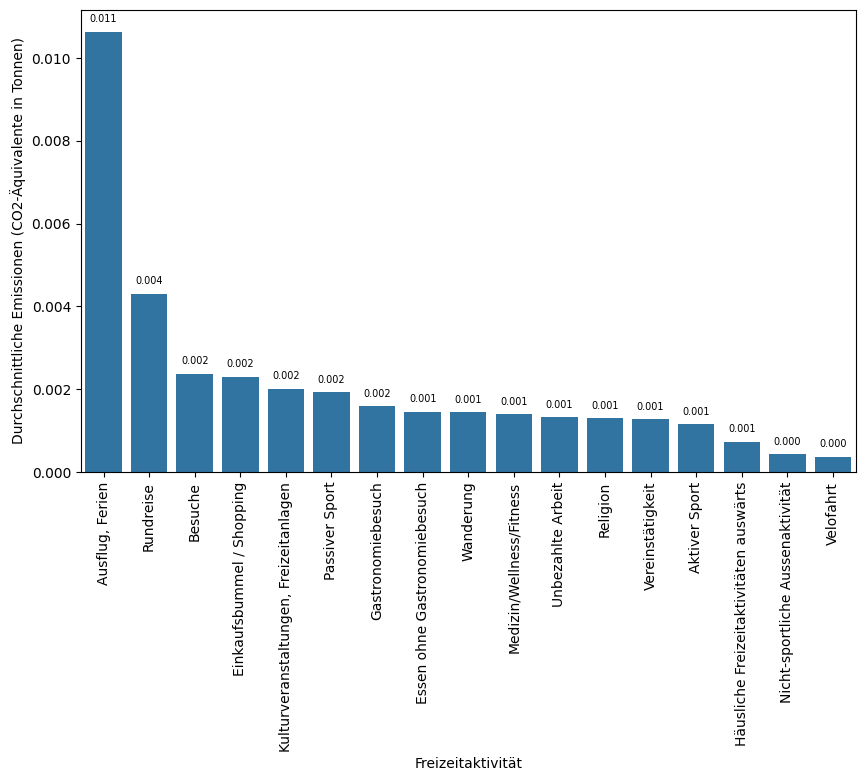

In [43]:
# Zählen der durchschnittlichen Emissionen je Freizeitaktivität
emissionen_aktivitaet = (
    wege_freizeit_erweitert.groupby("Freizeitaktivität")["Emissionen"]
    .mean()
    .sort_index()
)

# Umrechnung der Emissionen in Tonnen
emissionen_aktivitaet = (emissionen_aktivitaet / 1_000_000).sort_values(
    ascending=False
)  # Umrechnung von g in Tonnen

# Erstellen des Barplots
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=emissionen_aktivitaet.index, y=emissionen_aktivitaet.values)

# Hinzufügen von Achsenbeschriftungen und Titel
plt.xlabel("Freizeitaktivität")
plt.ylabel("Durchschnittliche Emissionen (CO2-Äquivalente in Tonnen)")
plt.xticks(rotation=90)

# Säulen mit den jeweiligen Werten beschriften
for p in ax.patches:
    # Beschriftung der Werte direkt auf den Säulen
    ax.annotate(
        f"{p.get_height():.3f}",  # Werte mit 3 Dezimalstellen anzeigen
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        fontsize=7,
        color="black",
        xytext=(0, 9),
        textcoords="offset points",
    )

# Plot anzeigen
plt.show()

# Einfluss des Alters (Regression)

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\2625897336.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  wege_freizeit_erweitert.groupby("Alter")["Emissionen"].mean().reset_index()
C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\2625897336.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Alter", y="Emissionen", data=mean_emissions, palette="viridis")


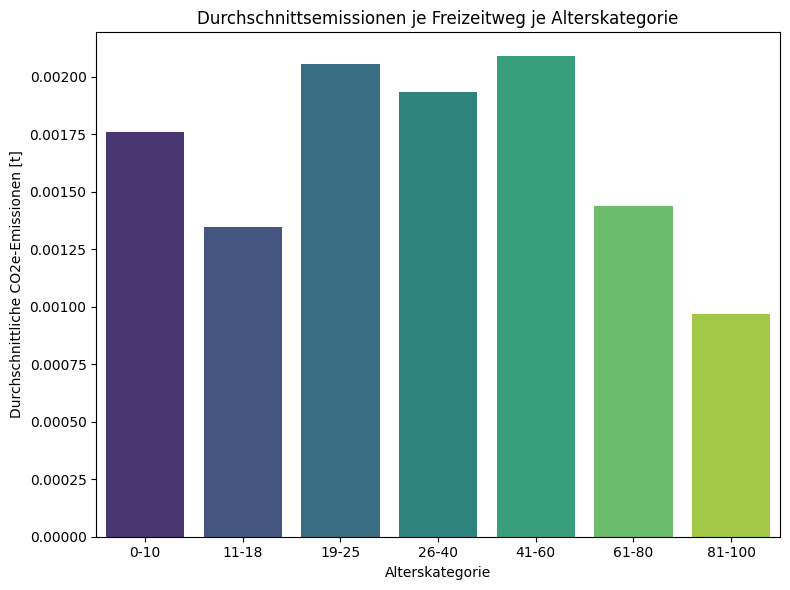

In [49]:
# Durchschnittsemissionen je Alterskategorie berechnen
mean_emissions = (
    wege_freizeit_erweitert.groupby("Alter")["Emissionen"].mean().reset_index()
)
# Umrechnen der Emissionen in Tonnen
mean_emissions["Emissionen"] = mean_emissions["Emissionen"] / 1_000_000

# Barplot erstellen
plt.figure(figsize=(8, 6))
sns.barplot(x="Alter", y="Emissionen", data=mean_emissions, palette="viridis")

# Achsenbeschriftungen hinzufügen
plt.xlabel("Alterskategorie")
plt.ylabel("Durchschnittliche CO2e-Emissionen [t]")

# Titel hinzufügen (optional)
plt.title("Durchschnittsemissionen je Freizeitweg je Alterskategorie")

# Diagramm anzeigen
plt.tight_layout()
plt.show()

C:\Users\annhe\AppData\Local\Temp\ipykernel_26336\3420943582.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


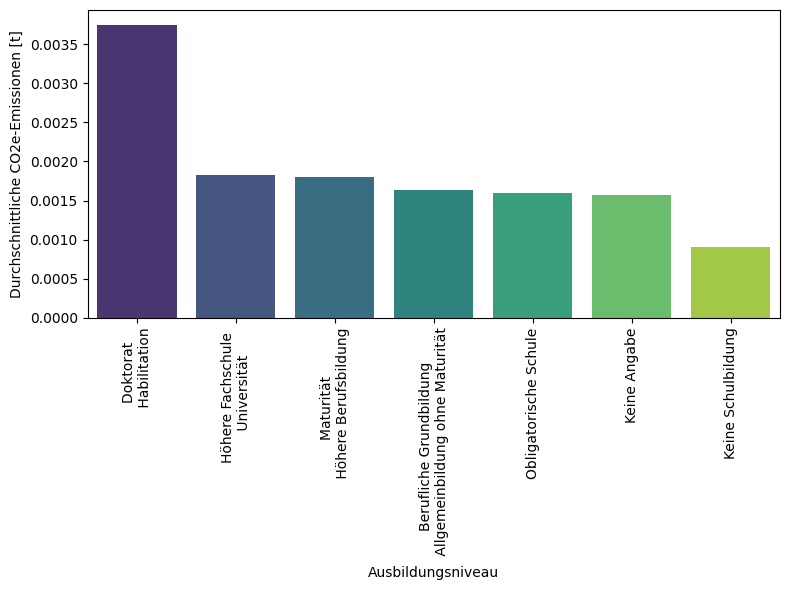

In [50]:
# Durchschnittsemissionen je Ausbildungsniveau berechnen
mean_emissions = (
    wege_freizeit_erweitert.groupby("Ausbildungsniveau")["Emissionen"]
    .mean()
    .reset_index()
)
#Emissionen in Tonnen umrechnen
mean_emissions["Emissionen"] = mean_emissions["Emissionen"] / 1_000_000
# Sortieren
mean_emissions = mean_emissions.sort_values("Emissionen", ascending=False)

# Barplot erstellen
plt.figure(figsize=(8, 6))
ax = sns.barplot(
    x="Ausbildungsniveau", y="Emissionen", data=mean_emissions, palette="viridis"
)

# Achsenbeschriftungen hinzufügen
plt.xlabel("Ausbildungsniveau")
plt.ylabel("Durchschnittliche CO2e-Emissionen [t]")

# x-Ticks bei '/' umgebrochen
labels = [label.replace("/", "\n") for label in mean_emissions["Ausbildungsniveau"]]
plt.xticks(ticks=range(len(mean_emissions)), labels=labels, rotation=90)

# Diagramm anzeigen
plt.tight_layout()
plt.show()